In [15]:
import pandas as pd
import numpy as np
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU
from keras.layers import Dropout
from keras.layers.embeddings import Embedding
from keras import layers
from sklearn.metrics import confusion_matrix,classification_report

In [22]:
df = pd.read_excel ('test.xlsx') 
df

,prev_2t,prev_t,Word,next_t,next_2t,0,1,2,3,4,...,23,24,25,26,27,28,29,30,31,class
0,NaN,NaN,অস্ট্রেলিয়ার,সিডনির,ম্যাকওয়ারি,1.065212,0.458311,0.658449,0.851267,0.642571,...,0.849722,0.269087,0.993979,1.083685,0.264122,0.495053,1.005416,0.740280,0.309153,not event
1,NaN,অস্ট্রেলিয়ার,সিডনির,ম্যাকওয়ারি,বিশ্ববিদ্যালয়ে,0.655353,0.378614,1.010234,1.037825,0.875950,...,1.119942,1.029344,0.435755,0.952289,1.042146,0.330705,0.763490,0.270210,0.765840,not event
2,অস্ট্রেলিয়ার,সিডনির,ম্যাকওয়ারি,বিশ্ববিদ্যালয়ে,বছরের,0.403964,0.452500,0.695190,1.093361,0.808709,...,0.699272,0.400624,0.484002,0.664833,0.695255,0.877164,1.135145,1.027893,0.900789,not event
3,সিডনির,ম্যাকওয়ারি,বিশ্ববিদ্যালয়ে,বছরের,ফেব্রুয়ারি,0.253766,0.194770,0.442101,0.351051,1.047031,...,0.627109,1.099211,0.839023,0.328318,0.502781,0.952639,0.735225,0.538891,0.376244,not event
4,ম্যাকওয়ারি,বিশ্ববিদ্যালয়ে,বছরের,ফেব্রুয়ারি,সেশনে,1.080591,0.247263,0.783865,1.073056,0.678846,...,1.039573,0.695120,0.567450,0.622855,0.923105,0.547295,0.977882,0.452508,1.117842,not event
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,অনুষ্ঠানটি,উপস্থাপনা,স্বাগত,সম্পাদক,খলিলুর,0.373112,0.831647,0.763766,0.397133,0.219678,...,0.663314,0.668579,0.310295,1.010063,0.374969,0.675856,0.400098,0.465884,1.136187,not event
157,উপস্থাপনা,স্বাগত,সম্পাদক,খলিলুর,পর্বে,0.360619,0.537351,0.509267,1.046646,0.320436,...,0.708681,0.681685,0.441341,0.877110,1.156811,0.585852,0.710907,0.983406,0.656157,not event
158,স্বাগত,সম্পাদক,খলিলুর,পর্বে,অনুষ্ঠানে,0.316630,0.266114,1.043380,0.802580,0.794168,...,0.908570,1.221956,0.956329,0.545493,0.705635,1.023264,0.778715,0.792393,0.560241,event
159,সম্পাদক,খলিলুর,পর্বে,অনুষ্ঠানে,NaN,0.930987,0.839666,1.087890,0.946772,0.274437,...,0.616596,0.557665,0.410402,0.707961,0.222590,0.866323,0.619137,0.674066,0.585274,event


In [23]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [24]:
df['Word'] = labelencoder.fit_transform(df['Word'].astype(str))
df['prev_t'] = labelencoder.fit_transform(df['prev_t'].astype(str))
df['prev_2t'] = labelencoder.fit_transform(df['prev_2t'].astype(str))
df['next_t'] = labelencoder.fit_transform(df['next_t'].astype(str))
df['next_2t'] = labelencoder.fit_transform(df['next_2t'].astype(str))
df['class'] = labelencoder.fit_transform(df['class'].astype(str))

In [25]:
df

,prev_2t,prev_t,Word,next_t,next_2t,0,1,2,3,4,...,23,24,25,26,27,28,29,30,31,class
0,0,0,10,147,119,1.065212,0.458311,0.658449,0.851267,0.642571,...,0.849722,0.269087,0.993979,1.083685,0.264122,0.495053,1.005416,0.740280,0.309153,1
1,0,10,147,119,101,0.655353,0.378614,1.010234,1.037825,0.875950,...,1.119942,1.029344,0.435755,0.952289,1.042146,0.330705,0.763490,0.270210,0.765840,1
2,10,147,119,101,92,0.403964,0.452500,0.695190,1.093361,0.808709,...,0.699272,0.400624,0.484002,0.664833,0.695255,0.877164,1.135145,1.027893,0.900789,1
3,146,119,101,92,90,0.253766,0.194770,0.442101,0.351051,1.047031,...,0.627109,1.099211,0.839023,0.328318,0.502781,0.952639,0.735225,0.538891,0.376244,1
4,118,101,92,90,148,1.080591,0.247263,0.783865,1.073056,0.678846,...,1.039573,0.695120,0.567450,0.622855,0.923105,0.547295,0.977882,0.452508,1.117842,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,5,35,153,141,53,0.373112,0.831647,0.763766,0.397133,0.219678,...,0.663314,0.668579,0.310295,1.010063,0.374969,0.675856,0.400098,0.465884,1.136187,1
157,35,153,141,53,75,0.360619,0.537351,0.509267,1.046646,0.320436,...,0.708681,0.681685,0.441341,0.877110,1.156811,0.585852,0.710907,0.983406,0.656157,1
158,152,141,53,75,7,0.316630,0.266114,1.043380,0.802580,0.794168,...,0.908570,1.221956,0.956329,0.545493,0.705635,1.023264,0.778715,0.792393,0.560241,0
159,140,53,75,7,0,0.930987,0.839666,1.087890,0.946772,0.274437,...,0.616596,0.557665,0.410402,0.707961,0.222590,0.866323,0.619137,0.674066,0.585274,0


In [26]:
X = df.iloc[:,0:37] 
Y = df.iloc[:,37]

In [29]:
Y.head(15)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    0
11    0
12    0
13    0
14    0
Name: class, dtype: int32

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.2,random_state=0)

In [9]:
# 1 for not-event
# 0 for event

In [34]:
max_vocab = 10000
max_len = 37
embedding_mat_columns=128
model = Sequential()
model.add(Embedding(input_dim=max_vocab, output_dim=embedding_mat_columns, input_length=max_len))
#model.add(GRU(output_dim=128, activation='sigmoid'))
model.add(LSTM(units=embedding_mat_columns))
#model.add(GRU(units=embedding_mat_columns))
#model.add(Dropout(0.5))
model.add(layers.Dense(100, activation='sigmoid'))
model.add(layers.Dense(1, activation='sigmoid'))

In [35]:
model.compile(loss='binary_crossentropy', optimizer='adagrad', metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 37, 128)           1280000   
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_3 (Dense)              (None, 100)               12900     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 1,424,585
Trainable params: 1,424,585
Non-trainable params: 0
_________________________________________________________________


In [37]:
 history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), nb_epoch=100, batch_size=10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 128 samples, validate on 33 samples
Epoch 1/100
128/128 [==============================] - 3s 25ms/step - loss: 0.7025 - accuracy: 0.5547 - val_loss: 0.6709 - val_accuracy: 0.6061
Epoch 2/100
128/128 [==============================] - 1s 10ms/step - loss: 0.6818 - accuracy: 0.6016 - val_loss: 0.6719 - val_accuracy: 0.6061
Epoch 3/100
128/128 [==============================] - 1s 7ms/step - loss: 0.6738 - accuracy: 0.6016 - val_loss: 0.6711 - val_accuracy: 0.6061
Epoch 4/100
128/128 [==============================] - 1s 9ms/step - loss: 0.6808 - accuracy: 0.6016 - val_loss: 0.6712 - val_accuracy: 0.6061
Epoch 5/100
128/128 [==============================] - 1s 7ms/step - loss: 0.6749 - accuracy: 0.6016 - val_loss: 0.6731 - val_accuracy: 0.6061
Epoch 6/100
128/128 [==============================] - 1s 7ms/step - loss: 0.6778 - accuracy: 0.6016 - val_loss: 0.6713 - val_accuracy: 0.6061
Epoch 7/100
128/128 [==============================] - 1s 7ms/step - loss: 0.6760 - accuracy: 0

128/128 [==============================] - 1s 8ms/step - loss: 0.2774 - accuracy: 0.8984 - val_loss: 0.4275 - val_accuracy: 0.8788
Epoch 58/100
128/128 [==============================] - 1s 7ms/step - loss: 0.2773 - accuracy: 0.8984 - val_loss: 0.4253 - val_accuracy: 0.8788
Epoch 59/100
128/128 [==============================] - 1s 7ms/step - loss: 0.2773 - accuracy: 0.8984 - val_loss: 0.4247 - val_accuracy: 0.8788
Epoch 60/100
128/128 [==============================] - 1s 7ms/step - loss: 0.2771 - accuracy: 0.8984 - val_loss: 0.4242 - val_accuracy: 0.8788
Epoch 61/100
128/128 [==============================] - 1s 7ms/step - loss: 0.2818 - accuracy: 0.8984 - val_loss: 0.4241 - val_accuracy: 0.8788
Epoch 62/100
128/128 [==============================] - 1s 7ms/step - loss: 0.2787 - accuracy: 0.8984 - val_loss: 0.4245 - val_accuracy: 0.8788
Epoch 63/100
128/128 [==============================] - 1s 7ms/step - loss: 0.2774 - accuracy: 0.8984 - val_loss: 0.4237 - val_accuracy: 0.8788
Epoch

In [38]:
result = model.evaluate(X_train, Y_train)

128/128 [==============================] - 0s 586us/step


In [39]:
print("%s: %.2f%%" % (model.metrics_names[1], result[1]*100))

accuracy: 91.41%


In [41]:
result

[0.2472224161028862, 0.9140625]

In [43]:
from sklearn.metrics import confusion_matrix,classification_report
pred = model.predict_classes(X_test)
acc = model.evaluate(X_test, Y_test)
print("Test loss is {0:.2f} accuracy is {1:.2f} ".format(acc[0],acc[1]))
print(classification_report(pred,Y_test))
print(confusion_matrix(pred,Y_test))

33/33 [==============================] - 0s 873us/step
Test loss is 0.42 accuracy is 0.88 
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        13
           1       0.90      0.90      0.90        20

    accuracy                           0.88        33
   macro avg       0.87      0.87      0.87        33
weighted avg       0.88      0.88      0.88        33

[[11  2]
 [ 2 18]]


In [49]:
from matplotlib import pyplot

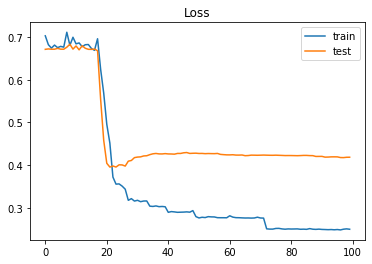

In [50]:
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

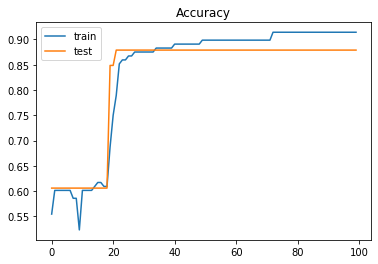

In [51]:
#pyplot.subplot(211)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()